In [18]:
#From SAV to LOVE

# HW2

In [7]:
import warnings
from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

warnings.simplefilter("ignore")

## –ó–∞–¥–∞–Ω–∏–µ 1.

–°–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞—Ç—å –¥–∞—Ç–∞—Å–µ—Ç –ø—Ä–∏ –ø–æ–º–æ—â–∏ sklearn.datasets.make_regression –∏ –æ–±—É—á–∏—Ç—å –ª–∏–Ω–µ–π–Ω—É—é –º–æ–¥–µ–ª—å –ø—Ä–∏ –ø–æ–º–æ—â–∏ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ –∏ —Å—Ç–æ—Ö–∞—Å—Ç–∏—á–µ—Å–∫–æ–≥–æ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞. –ù–∞–Ω–µ—Å—Ç–∏ —Å—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω—É—é –æ—à–∏–±–∫—É –¥–ª—è –æ–±–æ–∏—Ö –º–µ—Ç–æ–¥–æ–≤ –Ω–∞ –æ–¥–∏–Ω –≥—Ä–∞—Ñ–∏–∫, —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥—ã –æ —Ä–∞–∑–Ω–∏—Ü–µ —Å–∫–æ—Ä–æ—Å—Ç–∏ —Å—Ö–æ–¥–∏–º–æ—Å—Ç–∏ –∫–∞–∂–¥–æ–≥–æ –∏–∑ –º–µ—Ç–æ–¥–æ–≤.

# –†–µ—à–µ–Ω–∏–µ –∑–∞–¥–∞—á–∏ ‚Ññ1

In [8]:
X, y, coef_ = make_regression(n_samples=1000, n_features=3,n_targets=1,noise=10,coef=True,random_state=27)

In [9]:
def calculate_mse(y_true: np.array, y_pred: np.array) -> float:
    """
    –í—ã—á–∏—Å–ª–µ–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫–∏ MSE (Mean-Squared-Error).

    Parameters
    ----------
    y_true: np.array
        –í–µ–∫—Ç–æ—Ä –∏—Å—Ç–∏–Ω–Ω—ã—Ö –æ—Ç–≤–µ—Ç–æ–≤.

    y_pred: np.array
        –í–µ–∫—Ç–æ—Ä –ø—Ä–æ–≥–Ω–æ–∑–æ–≤.

    Returns
    -------
    score: float
        –ó–Ω–∞—á–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞.

    """
    assert len(y_true) == len(y_pred)
    score = np.mean(np.square(y_true - y_pred))

    return score


def fit_linear_model(X: np.array,
                     y: np.array,
                     batch_size: int = 32,
                     learning_rate: float = 0.01,
                     n_iters: int = 1000,
                     tol: float = 1e-5):
    """
    –û–±—É—á–µ–Ω–∏–µ –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –∞–ª–≥–æ—Ä–∏—Ç–º–æ–º –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞.

    Parameters
    ----------
    X: np.array
        –ú–∞—Ç—Ä–∏—Ü–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è.

    y: np.array
        –í–µ–∫—Ç–æ—Ä —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –¥–ª—è –æ–±—É—á–µ–Ω–∏—è.

    batch_size: int, optional, default = 32
        –†–∞–∑–º–µ—Ä –±–∞—Ç—á–∞ –¥–ª—è –æ–¥–Ω–æ–π –∏—Ç–µ—Ä–∞—Ü–∏–∏ –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä–∞.
        –û–ø—Ü–∏–æ–Ω–∞–ª—å–Ω—ã–π –ø–∞—Ä–∞–º–µ—Ç—Ä, –ø–æ —É–º–æ–ª—á–∞–Ω–∏—é, —Ä–∞–≤–µ–Ω 32.

    learning_rate: float, optional, default = 0.01
        –°–∫–æ—Ä–æ—Å—Ç—å –æ–±—É—á–µ–Ω–∏—è. –û–ø—Ü–∏–æ–Ω–∞–ª—å–Ω—ã–π –ø–∞—Ä–∞–º–µ—Ç—Ä, –ø–æ
        —É–º–æ–ª—á–∞–Ω–∏—é, —Ä–∞–≤–µ–Ω 0.01.

    n_iters: int, optional, default = 1000
        –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π –æ–±—É—á–µ–Ω–∏—è. –û–ø—Ü–∏–æ–Ω–∞–ª—å–Ω—ã–π –ø–∞—Ä–∞–º–µ—Ç—Ä,
        –ø–æ —É–º–æ–ª—á–∞–Ω–∏—é, —Ä–∞–≤–µ–Ω 1000.

    tol: float, optional, default = 1e-5
        –ú–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–∏–º–æ–µ –∏–∑–º–µ–Ω–µ–Ω–∏–µ –æ—à–∏–±–∫–∏, –ø—Ä–∏ –∫–æ—Ç–æ—Ä–æ–º
        –æ–±—É—á–µ–Ω–∏–µ –ø—Ä–æ–¥–æ–ª–∂–∞–µ—Ç—Å—è. –ï—Å–ª–∏ –∏–∑–º–µ–Ω–µ–Ω–∏–µ –æ—à–∏–±–∫–∏ –Ω–∞ —Å–æ—Å–µ–¥–Ω–∏—Ö
        –∏—Ç–µ—Ä–∞—Ü–∏—è—Ö –º–µ–Ω—å—à–µ —É–∫–∞–∑–∞–Ω–Ω–æ–π –≤–µ–ª–∏—á–∏–Ω—ã, —Ç–æ –æ–±—É—á–µ–Ω–∏–µ –ø—Ä–µ–∫—Ä–∞—â–∞–µ—Ç—Å—è.

    Returns
    -------
    weights: np.array
        –í–µ–∫—Ç–æ—Ä –≤–µ—Å–æ–≤ –ª–∏–Ω–µ–π–Ω–æ–π –º–æ–¥–µ–ª–∏.

    weights_history: List[np.array]
        –°–ø–∏—Å–æ–∫ —Å –≤–µ–∫—Ç–æ—Ä–∞–º–∏ –≤–µ—Å–æ–≤ –Ω–∞ –∫–∞–∂–¥–æ–π –∏—Ç–µ—Ä–∞—Ü–∏–∏ –æ–±—É—á–µ–Ω–∏—è.

    errors_history: List[float]
        –°–ø–∏—Å–æ–∫ —Å–æ –∑–Ω–∞—á–µ–Ω–∏–µ–º –æ—à–∏–±–∫–∏ –Ω–∞ –∫–∞–∂–¥–æ–π –∏—Ç–µ—Ä–∞—Ü–∏–∏ –æ–±—É—á–µ–Ω–∏—è.

    """
    weights = np.random.randn(X.shape[1])
    errors_history, weights_history = [], [weights]
    n_batches = len(y) // batch_size

    if len(y) % batch_size:
        n_batches += 1

    for n_iter in tqdm(range(n_iters)):
        for batch_number in range(n_batches):
            x_batch = X[batch_number*batch_size:(batch_number+1)*batch_size]
            y_batch = y[batch_number*batch_size:(batch_number+1)*batch_size]

            y_pred = np.dot(weights, x_batch.T)
            current_error = calculate_mse(y_batch, y_pred)
            weights -= 2*learning_rate*np.sum(x_batch.T*(y_pred - y_batch), axis=1)/len(y_pred)
            errors_history.append(current_error)
            weights_history.append(weights)

        if n_iter > 2 and np.abs(current_error - errors_history[-2]) < tol:
            break
        
    return weights, weights_history, errors_history

In [10]:
np.random.seed(27)
gd_weights, gd_weights_history, gd_errors_history = fit_linear_model(
    X, y, batch_size=X.shape[0])

  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]


In [11]:
np.random.seed(27)
sgd_weights, sgd_weights_history, sgd_errors_history = fit_linear_model(
    X, y, batch_size=1)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1000/1000 [00:20<00:00, 48.67it/s]


(0, 400)

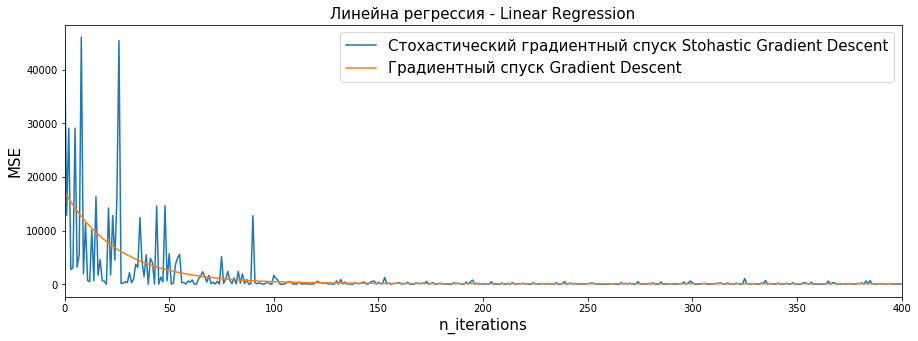

In [12]:
fig = plt.figure(figsize=(15, 5))
plt.title("–õ–∏–Ω–µ–π–Ω–∞ —Ä–µ–≥—Ä–µ—Å—Å–∏—è - Linear Regression", size=15)
plt.plot(sgd_errors_history, label="–°—Ç–æ—Ö–∞—Å—Ç–∏—á–µ—Å–∫–∏–π –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫ Stohastic Gradient Descent")
plt.plot(gd_errors_history, label="–ì—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫ Gradient Descent")
plt.legend(loc="best", fontsize=15)
plt.xlabel("n_iterations", size=15)
plt.ylabel("MSE", size=15)
plt.xlim(0, 400)

## –ó–∞–¥–∞–Ω–∏–µ 2

–ú–æ–¥–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞—Ç—å —Ä–µ—à–µ–Ω–∏–µ –ø–µ—Ä–≤–æ–≥–æ –∑–∞–¥–∞–Ω–∏—è –ø—É—Ç–µ–º –¥–æ–±–∞–≤–ª–µ–Ω–∏—è $ùêø_2$-—Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏ (–≤ —Ñ—É–Ω–∫—Ü–∏—é, —Å—á–∏—Ç–∞—é—â—É—é MSE, –Ω—É–∂–Ω–æ –¥–æ–±–∞–≤–∏—Ç—å –Ω–æ—Ä–º—É –≤–µ–∫—Ç–æ—Ä–∞ –≤–µ—Å–æ–≤) –∏ —Å—Ä–∞–≤–Ω–∏—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã.

# –†–µ—à–µ–Ω–∏–µ –∑–∞–¥–∞—á–∏ ‚Ññ2

In [13]:
def fit_ridge_model(X: np.array,
                    y: np.array,
                    batch_size: int = 32,
                    lambda_coef: float = 0.01,
                    learning_rate: float = 0.01,
                    n_iters: int = 1000,
                    tol: float = 1e-5):
    """
    –û–±—É—á–µ–Ω–∏–µ Ridge-—Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –∞–ª–≥–æ—Ä–∏—Ç–º–æ–º –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞.

    Parameters
    ----------
    X: np.array
        –ú–∞—Ç—Ä–∏—Ü–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è.

    y: np.array
        –í–µ–∫—Ç–æ—Ä —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –¥–ª—è –æ–±—É—á–µ–Ω–∏—è.

    batch_size: int, optional, default = 32
        –†–∞–∑–º–µ—Ä –±–∞—Ç—á–∞ –¥–ª—è –æ–¥–Ω–æ–π –∏—Ç–µ—Ä–∞—Ü–∏–∏ –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä–∞.
        –û–ø—Ü–∏–æ–Ω–∞–ª—å–Ω—ã–π –ø–∞—Ä–∞–º–µ—Ç—Ä, –ø–æ —É–º–æ–ª—á–∞–Ω–∏—é, —Ä–∞–≤–µ–Ω 32.

    lambda_coef: float, optional, default = 0.01
        –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏.
        –û–ø—Ü–∏–æ–Ω–∞–ª—å–Ω—ã–π –ø–∞—Ä–∞–º–µ—Ç—Ä, –ø–æ —É–º–æ–ª—á–∞–Ω–∏—é, —Ä–∞–≤–µ–Ω 0.01.

    learning_rate: float, optional, default = 0.01
        –°–∫–æ—Ä–æ—Å—Ç—å –æ–±—É—á–µ–Ω–∏—è.
        –û–ø—Ü–∏–æ–Ω–∞–ª—å–Ω—ã–π –ø–∞—Ä–∞–º–µ—Ç—Ä, –ø–æ —É–º–æ–ª—á–∞–Ω–∏—é, —Ä–∞–≤–µ–Ω 0.01.

    n_iters: int, optional, default = 1000
        –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π –æ–±—É—á–µ–Ω–∏—è. 
        –û–ø—Ü–∏–æ–Ω–∞–ª—å–Ω—ã–π –ø–∞—Ä–∞–º–µ—Ç—Ä, –ø–æ —É–º–æ–ª—á–∞–Ω–∏—é, —Ä–∞–≤–µ–Ω 1000.

    tol: float, optional, default = 1e-5
        –ú–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–∏–º–æ–µ –∏–∑–º–µ–Ω–µ–Ω–∏–µ –æ—à–∏–±–∫–∏, –ø—Ä–∏ –∫–æ—Ç–æ—Ä–æ–º
        –æ–±—É—á–µ–Ω–∏–µ –ø—Ä–æ–¥–æ–ª–∂–∞–µ—Ç—Å—è. –ï—Å–ª–∏ –∏–∑–º–µ–Ω–µ–Ω–∏–µ –æ—à–∏–±–∫–∏ –Ω–∞ —Å–æ—Å–µ–¥–Ω–∏—Ö
        –∏—Ç–µ—Ä–∞—Ü–∏—è—Ö –º–µ–Ω—å—à–µ —É–∫–∞–∑–∞–Ω–Ω–æ–π –≤–µ–ª–∏—á–∏–Ω—ã, —Ç–æ –æ–±—É—á–µ–Ω–∏–µ –ø—Ä–µ–∫—Ä–∞—â–∞–µ—Ç—Å—è.

    Returns
    -------
    weights: np.array
        –í–µ–∫—Ç–æ—Ä –≤–µ—Å–æ–≤ –ª–∏–Ω–µ–π–Ω–æ–π –º–æ–¥–µ–ª–∏.

    weights_history: List[np.array]
        –°–ø–∏—Å–æ–∫ —Å –≤–µ–∫—Ç–æ—Ä–∞–º–∏ –≤–µ—Å–æ–≤ –Ω–∞ –∫–∞–∂–¥–æ–π –∏—Ç–µ—Ä–∞—Ü–∏–∏ –æ–±—É—á–µ–Ω–∏—è.

    errors_history: List[float]
        –°–ø–∏—Å–æ–∫ —Å–æ –∑–Ω–∞—á–µ–Ω–∏–µ–º –æ—à–∏–±–∫–∏ –Ω–∞ –∫–∞–∂–¥–æ–π –∏—Ç–µ—Ä–∞—Ü–∏–∏ –æ–±—É—á–µ–Ω–∏—è.

    """
    weights = np.random.randn(X.shape[1])
    errors_history, weights_history = [], [weights]
    n_batches = len(y) // batch_size

    if len(y) % batch_size:
        n_batches += 1

    for n_iter in tqdm(range(n_iters)):
        for batch_number in range(n_batches):
            x_batch = X[batch_number*batch_size:(batch_number+1)*batch_size]
            y_batch = y[batch_number*batch_size:(batch_number+1)*batch_size]

            y_pred = np.dot(weights, x_batch.T)
            current_error = calculate_mse(y_batch, y_pred)

            weights -= 2*learning_rate*(np.sum(x_batch.T*(y_pred - y_batch), axis=1)/len(y_pred) + 2*lambda_coef*weights)
            errors_history.append(current_error)
            weights_history.append(weights)

        if n_iter > 2 and np.abs(current_error - errors_history[-2]) < 1e-4:
            break
        
    return weights, weights_history, errors_history

In [14]:
gd_ridge_weights, gd_ridge_weights_history, gd_ridge_errors_history = fit_ridge_model(
    X, y, batch_size=X.shape[0])

  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]


In [15]:
sgd_ridge_weights, sgd_ridge_weights_history, sgd_ridge_errors_history = fit_ridge_model(
    X, y, batch_size=1)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1000/1000 [00:23<00:00, 42.25it/s]


(0, 500)

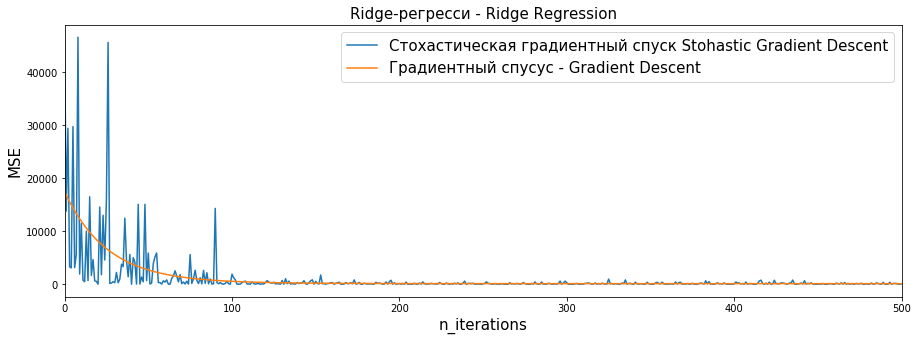

In [16]:
fig = plt.figure(figsize=(15, 5))
plt.title("Ridge-—Ä–µ–≥—Ä–µ—Å—Å–∏ - Ridge Regression", size=15)
plt.plot(sgd_ridge_errors_history, label="–°—Ç–æ—Ö–∞—Å—Ç–∏—á–µ—Å–∫–∞—è –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫ Stohastic Gradient Descent")
plt.plot(gd_ridge_errors_history, label="–ì—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å—É—Å - Gradient Descent")
plt.legend(loc="best", fontsize=15)
plt.xlabel("n_iterations", size=15)
plt.ylabel("MSE", size=15)
plt.xlim(0, 500)

(0, 500)

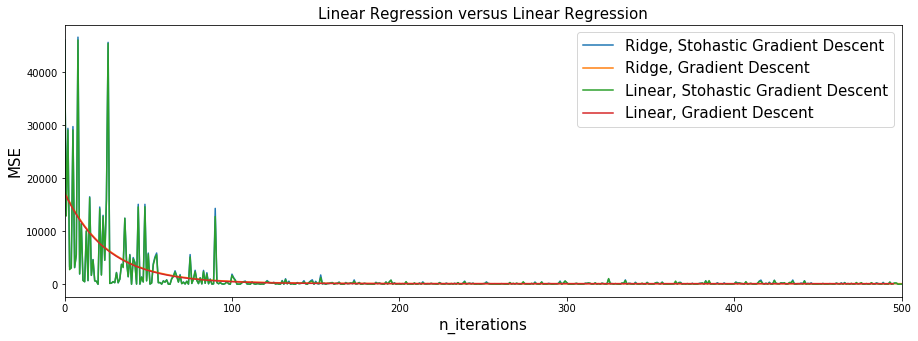

In [17]:
fig = plt.figure(figsize=(15, 5))
plt.title("Linear Regression versus Linear Regression", size=15)
plt.plot(sgd_ridge_errors_history, label="Ridge, Stohastic Gradient Descent")
plt.plot(gd_ridge_errors_history, label="Ridge, Gradient Descent")
plt.plot(sgd_errors_history, label="Linear, Stohastic Gradient Descent")
plt.plot(gd_errors_history, label="Linear, Gradient Descent")
plt.legend(loc="best", fontsize=15)
plt.xlabel("n_iterations", size=15)
plt.ylabel("MSE", size=15)
plt.xlim(0, 500)